# Financial Analysis - 3

- **Capital Assets Pricing Model (CAPM)** = describes the relationship beyween *expected* return and risk of securities. It indicates the expected return on a security being == risk free return + risk premium

#### CAPM Formula

- expected return on security <code>(R_i)</code>
- risk free rate of return <code>(R_f)</code>
- beta between stock & market <code>(B_i)</code>
- risk premium (incentive for risky investment in a security) <code>(R_m - R_f)</code>

<code>R_i = (R_f) + (B_i) * (R_m - R_f)</code>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
stocks_df = pd.read_csv('stock.csv')
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [4]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [5]:
from copy import copy

# Function to normalize the prices based on the initial price
# take stock values div by initial value (row 1)
# Ex: ALL sp500 values divide by 1295.500000 == 1.00
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0] # column i / row i 
    return x # make sure return is not indented => diff results

In [6]:
# PLOTLY PLOTS
def plotly_plot(df, title):
    
    fig = px.line(title=title)
    
    for i in df.columns[1:]:
        # add scatter trace to object
        fig.add_scatter(x=df['Date'] , y=df[i] , name= i) # i = name of stocks
        fig.layout.template = 'plotly_dark'
        
    fig.show()

In [7]:
# NORMALIZE THE DATA 
df_porfolio = normalize(stocks_df)
df_porfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [9]:
# set seed
np.random.seed(101)

# random weights 
weights = np.array(np.random.random(9))   

# normalize them (sum to 1)
weights = weights /np.sum(weights) 

#  column names
df_porfolio.columns[1:] 

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [10]:
# enumerate the return value and counter it
for counter, stock in enumerate(df_porfolio.columns[1:]):
    df_porfolio[stock] = df_porfolio[stock] * weights[counter]
    df_porfolio[stock] = df_porfolio[stock] * 1e6 # $1 million
    
df_porfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597  
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487  
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881  
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712  
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810  
...            ...            ...           ...            ...            ...  
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760  
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529  
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817  
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149  
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603  

[2159 rows x 10 columns]

In [11]:
# NEW COLUMN FOR DAILY $ RETURNS ON STOCKS BASED ON $1 MILLION DOLLARS WITH RANDOM WEIGHTS
df_porfolio['Portfolio Daily $'] = df_porfolio[df_porfolio !='Date'].sum(axis=1)
# df_porfolio

#  NEW COLUMN FOR DAILY % DIFFERENCE ON STOCKS
df_porfolio['Daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
    df_porfolio['Daily % return'][i] = ((df_porfolio['Portfolio Daily $'][i] - df_porfolio['Portfolio Daily $'][i-1]) 
                                        / df_porfolio['Portfolio Daily $'][i-1]) *100 
    
df_porfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      Portfolio Daily $  Daily % return  
0          1.000000e+06        0.000000  
1          9.847792e+05       -1.522076  
2          1.000669e+06        1.613507  
3          1.013905e+06        1.322705  
4          1.020814e+06        0.681427  
...                 ...             ...  
2154       8.588634e+06        0.879605  
2155       8.664444e+06        0.882669  
2156       8.506059e+06       -1.827981  
2157       8.450456e+06       -0.653686  
2158       8.256690e+06       -2.292973  

[2159 rows x 12 columns]

In [12]:
df_porfolio['Portfolio Daily $'][-1:] # last value
df_porfolio['Portfolio Daily $'][0] # initial 

1000000.0000000001

In [13]:
# cumulative return: CR = (CSP) - (OSP) / (OSP) 

cumulative_return = ((df_porfolio['Portfolio Daily $'][-1:] - df_porfolio['Portfolio Daily $'][0] 
                     / df_porfolio['Portfolio Daily $'][0] ) ) #*100 

print("Cumulative Return {}".format(cumulative_return.values[0]))

#  portfolio std
portfolio_std = df_porfolio['Daily % return'].std()
print("Portfolio standard deviation {:.3f}".format(portfolio_std))

# avg daily portfolio return
avg_portfolio_daily_return = df_porfolio['Daily % return'].mean()
print("avg daily portfolio return {:.3f}%".format(avg_portfolio_daily_return))

# portfolio sharpe ratio
sharpe_ratio = (df_porfolio['Daily % return'].mean() / 
                df_porfolio['Daily % return'].std() * np.sqrt(252) ) # 255 trading days in a year
print("Sharpe Ratio {:.3f}".format(sharpe_ratio)) 

Cumulative Return 8256688.57781923
Portfolio standard deviation 1.449
avg daily portfolio return 0.108%
Sharpe Ratio 1.187


In [104]:
print("Cumulative Return {}".format(cumulative_return.values[0]))
print("Portfolio standard deviation {:.3f}".format(portfolio_std))
print("avg daily portfolio return {:.3f}%".format(avg_portfolio_daily_return))
print("Sharpe Ratio {:.3f}".format(sharpe_ratio)) 

Cumulative Return 8256688.57781923
Portfolio standard deviation 1.449
avg daily portfolio return 0.108%
Sharpe Ratio 1.187


### Calculate Daily Returns

In [28]:
def daily_return(df):
    df_daily_return =df.copy()
    
    # nested for loop, loop for columns
    for i in df.columns[1:]: # skip date column
        for j in range(1, len(df)): # loop on rows
            df_daily_return[i][j] = ( (df[i][j] - df[i][j-1]) / df[i][j-1] ) *100 # column, rows
    
    df_daily_return[i][0] = 0
    
    return df_daily_return

In [29]:
stocks_daily_returns = daily_return(stocks_df)
stocks_daily_returns 

Date       AAPL         BA          T        MGM        AMZN  \
0     2012-01-12  60.198570  75.510002  30.120001  12.130000  175.929993   
1     2012-01-13  -0.374946  -1.205144  -0.166006   1.813685    1.415339   
2     2012-01-17   1.164812   0.857909   0.598603  -0.809717    1.815943   
3     2012-01-18   1.038382  -0.239234   0.264463   3.918367    4.282725   
4     2012-01-19  -0.316937   0.666134   0.296736   0.549882    2.644634   
...          ...        ...        ...        ...        ...         ...   
2154  2020-08-05   0.362467   5.579446  -0.533156   0.000000    2.109065   
2155  2020-08-06   3.488923  -1.193483  -0.033501  10.406699    0.623082   
2156  2020-08-07  -2.449458  -1.265966   0.603217   3.087768   -1.784187   
2157  2020-08-10   1.453480   5.522880   0.599604  13.767729   -0.609323   
2158  2020-08-11  -2.973987   0.401316   0.000000  -0.692841   -2.143792   

             IBM       TSLA        GOOG     sp500  
0     180.550003  28.250000  313.644379  0.000000  
1      -0.769869 -19.327430   -0.738516 -0.494792  
2       0.468852  16.717854    0.574410  0.355295  
3       0.594448   0.789470    0.688856  1.110793  
4      -0.303752  -0.186494    1.052283  0.493866  
...          ...        ...         ...       ...  
2154   -0.309917  -0.133153    0.589774  0.642974  
2155    0.534082   0.307062    1.797626  0.642770  
2156   -0.919762  -2.475194   -0.373974  0.063303  
2157    1.720552  -2.350092    0.107728  0.274222  
2158   -0.283220  -3.114399   -1.054744 -0.796913  

[2159 rows x 10 columns]

In [30]:
# get the avg of each stock daily return
stocks_daily_returns.mean()

AAPL     0.135578
BA       0.100881
T        0.022110
MGM      0.070280
AMZN     0.232609
IBM      0.077536
TSLA     0.251483
GOOG     0.229665
sp500    0.049316
dtype: float64

## Calculate **Beta** for a stock

In [58]:
#  AAPL stock vs Market (S&P500)
#  daily returns

stocks_daily_returns['AAPL']
# stocks_daily_returns['TSLA']

0       60.198570
1       -0.374946
2        1.164812
3        1.038382
4       -0.316937
          ...    
2154     0.362467
2155     3.488923
2156    -2.449458
2157     1.453480
2158    -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [59]:
stocks_daily_returns['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

<AxesSubplot:xlabel='sp500', ylabel='AAPL'>

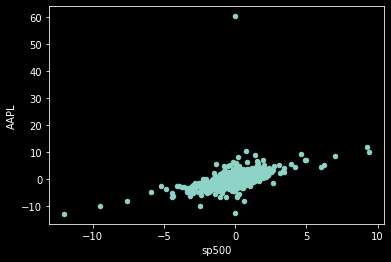

In [60]:
#  scatter plot x= return sp500, y= returns for apple

stocks_daily_returns.plot(kind='scatter', x='sp500', y='AAPL')
# stocks_daily_returns.plot(kind='scatter', x='sp500', y='TSLA')

In [61]:
fig =px.scatter(stocks_daily_returns, x='sp500',y='AAPL')
# fig =px.scatter(stocks_daily_returns, x='sp500',y='TSLA')

fig.layout.template = 'plotly_dark'
fig.show()

### **Beta** 

represents the slope of the regression line (makret return vs stock return). It measures the volatility / systematic risk of a security compared to the entire market, used in CAPM for showing relationships between systematic risk and expected return for assets. Beta indicates how volatile a stock's price has been in comparison to the market as a whole. A high beta may be preferred by an investor in growth stocks but shunned by investors who seek steady returns and lower risk.
 - Beta = 1.0 = strong price activity, correlated with the market
 - Beta < 1 = (defensive) the security is less volatile than the market
 - Beta > 1 = (aggressive) the security price is more volatile than the market. 


- Ex: Tesla, Beta =1.26, meaning 26% more volatile than the market, better in booming economy/ worse in recession

### **Alpha**

measures the amount that the investment has returned in comparison to the market index or other broad benchmark that it is compared against. Alpha shows how well (or badly) a stock has performed in comparison to a benchmark index. A high alpha is always good.

- An alpha of 1.0 means the investment outperformed its benchmark index by 1%. 
- An alpha of -1.0 means the investment underperformed its benchmark index by 1%. 
- If the alpha is zero, its return matched the benchmark.
    - Note, alpha is a historical number. It's useful to track a stock's alpha over time to see how it did, but it can't tell you how it will do tomorrow.

In [62]:
beta, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns['AAPL'], 1)
print("Beta for {} stock is {:.3f} and alpha is {:.3f}".format('AAPL',beta, alpha))

Beta for AAPL stock is 1.112 and alpha is 0.081


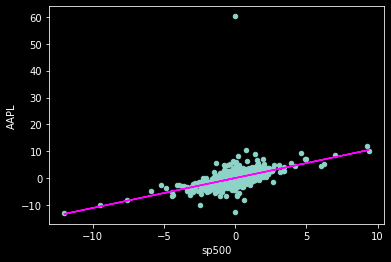

In [63]:
stocks_daily_returns.plot(kind='scatter', x='sp500', y='AAPL')
# stocks_daily_returns.plot(kind='scatter', x='sp500', y='TSLA')

# to add a line equation with Beta and Alpha parameters
# straight line equation  y= beta * rm + alpha
plt.style.use('dark_background')
plt.plot(stocks_daily_returns['sp500'], beta * stocks_daily_returns['sp500'] + alpha, 
         '-', color='magenta')


### Apply CAPM formula

In [64]:
beta

1.1116418625645925

In [65]:
#  avg daily return for sp500 stock
stocks_daily_returns['sp500'].mean()

0.04931600660038911

In [70]:
# calculate the annualized rate of return for sp500
# financial stock market closed 104 days in a year  # 365-104 = 261
rm = stocks_daily_returns['sp500'].mean() * 252
rm
print('if invested in S&P500, you will get an avg of {:.2f} % per year'.format(rm))

if invested in S&P500, you will get an avg of 12.43 % per year


In [73]:
#  risk free rate, assume value of zero
rf = 0

# calculate the return for stock using CAPM
ER_AAPL = rf + (beta * (rm - rf))
print("if invested in {}, expect a return of {:.3f}%".format('AAPL',ER_AAPL))

if invested in AAPL, expect a return of 13.815%


In [82]:
# compare market vs stock
comparison = rm < ER_AAPL
# comparison
print("investing in S&P500 (Market) has LESS return than {}\'s stock: {}".format('AAPL',comparison))

investing in S&P500 (Market) has LESS return than AAPL's stock: True


### Calculate Beta for *all* stocks

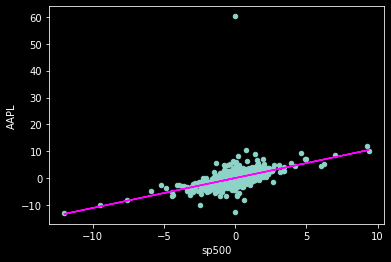

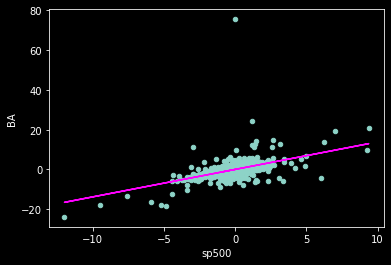

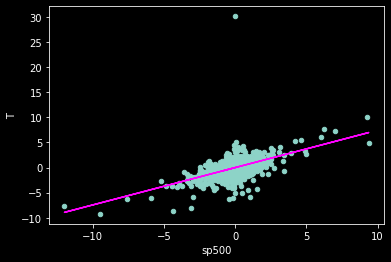

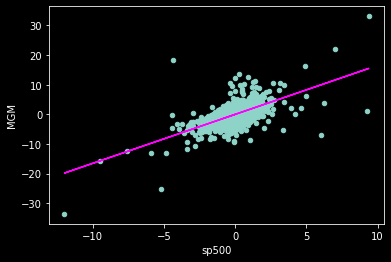

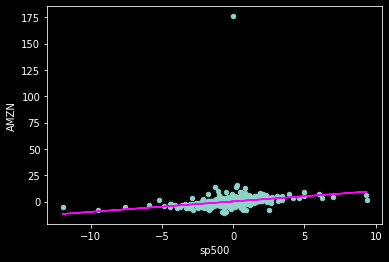

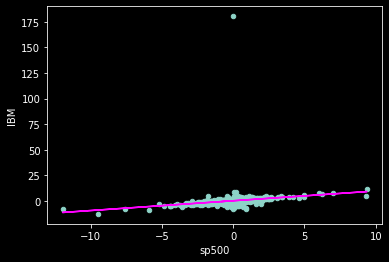

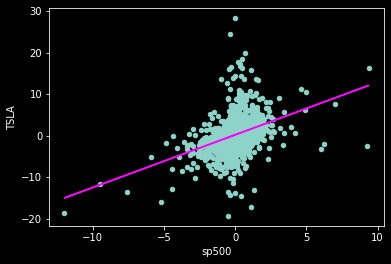

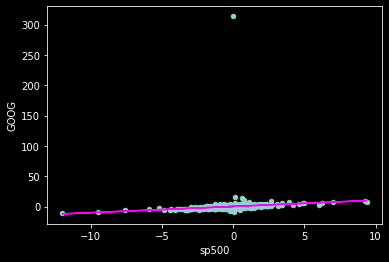

In [84]:
#  beta and alpha in empty dictionary
beta = {}
alpha = {}

# loop daily returns, skip date and sp500
for i in stocks_daily_returns.columns:
    if i != 'Date' and i != 'sp500':
        stocks_daily_returns.plot(kind='scatter', x='sp500', y=i)
        b,a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
        #best line fit
        plt.plot(stocks_daily_returns['sp500'], b * stocks_daily_returns['sp500'] + a, '-', color='magenta')
        
        beta[i] = b
        alpha[i] = a
        plt.show()

In [85]:
# beta for every stock
beta

{'AAPL': 1.1116418625645925,
 'BA': 1.3812985723508076,
 'T': 0.7440036389733954,
 'MGM': 1.6533157204751874,
 'AMZN': 0.9880798389617103,
 'IBM': 0.956664207407389,
 'TSLA': 1.268028150611669,
 'GOOG': 1.0283661870513114}

In [86]:
alpha

{'AAPL': 0.08075637389233492,
 'BA': 0.03276118634498974,
 'T': -0.014581669193407752,
 'MGM': -0.011254536750208464,
 'AMZN': 0.1838809971816285,
 'IBM': 0.03035670881414497,
 'TSLA': 0.18894862468217255,
 'GOOG': 0.17894989671540815}

In [89]:
#  plotly for every stock

# loop daily returns, skip date and sp500
for i in stocks_daily_returns.columns:
    if i != 'Date' and i != 'sp500':
        fig = px.scatter(stocks_daily_returns, x='sp500', y=i, title=i)
        b,a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
        fig.add_scatter(x=stocks_daily_returns['sp500'], y= b * stocks_daily_returns['sp500']+a)
        fig.layout.template = 'plotly_dark'
        fig.show()

## Apply CAPM formula for portfolio

In [91]:
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [93]:
# expected returns for each stock
ER = {}

rf = 0
rm = stocks_daily_returns['sp500'].mean() * 252

for i in keys:
    #CAPM formula
    ER[i] = rf + (beta[i] * (rm - rf))

In [95]:
for i in keys:
    print('Expected Return based on CAPM for {} is {:.3}%'.format(i,ER[i]))

Expected Return based on CAPM for AAPL is 13.8%
Expected Return based on CAPM for BA is 17.2%
Expected Return based on CAPM for T is 9.25%
Expected Return based on CAPM for MGM is 20.5%
Expected Return based on CAPM for AMZN is 12.3%
Expected Return based on CAPM for IBM is 11.9%
Expected Return based on CAPM for TSLA is 15.8%
Expected Return based on CAPM for GOOG is 12.8%


In [97]:
#  equal weighted stocks, $1 million distributed equally among stocks
#  excluding sp500
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [101]:
# assume equal weights in portfolio
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

#  portfolio return
print('expected return based on CAPM for portfolio is {:.3f}%'.format(ER_portfolio))

expected return based on CAPM for portfolio is 14.185%


Scenario: assume 50% allocation in Apple and 50% in Amazon

In [103]:
#            50%
ER_portfolio = 0.50 * ER['AAPL'] + 0.5 * ER['AMZN']
# ER_portfolio
#  portfolio return
print('expected return based on CAPM for portfolio is {:.3f}%'.format(ER_portfolio))

expected return based on CAPM for portfolio is 13.047%
